# Positional Encoding

## Continuing from the Embeddings

In the previous section, we obtained the following embeddings for our input sentence "This script implements a decoder-only Transformer model for text generation":

In [14]:
import torch

# Example input embeddings (first_sentence_indices embeddings)
first_sentence_embedding = torch.tensor([
    [0.0171,  0.0654,  0.4616, -0.0804,  0.7193, -1.7430,  0.7120, -0.5802,  2.7427, -0.7156], # This
    [0.0746, -1.0402,  1.6724,  0.2307,  0.0400,  1.0399,  0.3740, -0.5915,  1.3554, -2.3176], # script
    [-1.2554,  0.6687,  0.1003, -0.9104,  1.5644,  1.6488, -0.1967, -1.6907, -0.4079,  0.2899], # implements
    [-0.9756,  0.5243, -1.0213,  0.2623,  0.1009,  0.8176, -1.4203, -0.0846, -1.1753,  0.1989], # ...
    [0.3587, -0.0741, -1.8580,  1.1830, -0.3402, -0.9538,  1.9216, -0.3916,  0.2070,  0.5739],
    [-0.5651,  0.9522, -0.1525, -0.8550, -0.5317, -1.0827, -1.6945, -0.7518, -0.2396, -0.1583],
    [0.9786, -2.0795, -0.2498,  0.8052, -0.6686, -0.3186, -0.5592,  0.8016,  0.7862, -1.9430],
    [-1.0120,  1.3493,  0.9736,  0.2722, -1.9441, -0.1646, -0.9899,  0.8329,  0.2965,  0.0083],
    [0.6008, -0.7061,  2.3409, -0.8130, -0.0198,  0.8723, -1.0504, -0.3511,  0.9882, -0.5970],
    [-1.0111,  0.4195, -0.4477, -0.1732, -0.5706,  0.1802, -1.1488, -1.8112,  0.3398, -0.0526]
], dtype=torch.float).unsqueeze(0)

Step-by-Step Positional Encoding

Why Positional Encoding?

Transformers lack the inherent sequential information present in RNNs or CNNs. Positional encoding injects this information into the embeddings, allowing the model to understand the order of the tokens. The mathematical functions used ensure unique positional encodings for each token position.


### 1. Create Position Indices


- First, we create a tensor of shape `(max_len, 1)` where each element is the position index. This represents the position of each token in the sequence.

In [15]:
max_len = 5000  # Maximum length of the sequences
embedding_dim = first_sentence_embedding.size(2)  # Dimensionality of the embeddings
print(f"Embedding Dimension: {embedding_dim}")

# Create position indices
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
print("Position Indices:", position[:10])  # Display the first 10 positions

Embedding Dimension: 10
Position Indices: tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


### 2. Compute Divisors

- Next, we compute the divisors for the sine and cosine functions. These divisors are based on the formula:

In [16]:
import math
# Compute divisors
div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))
print("Divisors:", div_term)  # Display the divisors

Divisors: tensor([1.0000e+00, 1.5849e-01, 2.5119e-02, 3.9811e-03, 6.3096e-04])


### 3. Compute Sine and Cosine


We apply the sine function to even indices and the cosine function to odd indices of the positional encoding. This results in two interleaved sequences of sine and cosine values, ensuring that each position has a unique encoding.

Let's plot the sine and cosine functions for better understanding.

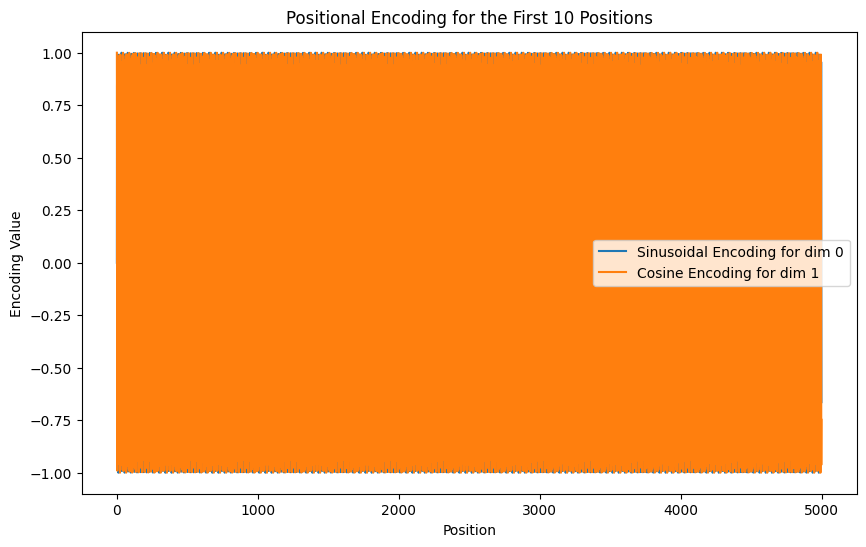

Sine Encoding: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 8.4147e-01,  1.5783e-01,  2.5116e-02,  3.9811e-03,  6.3096e-04],
        [ 9.0930e-01,  3.1170e-01,  5.0217e-02,  7.9621e-03,  1.2619e-03],
        ...,
        [ 9.5625e-01,  2.8574e-01, -1.4423e-01,  8.6435e-01, -1.1301e-02],
        [ 2.7050e-01,  4.3337e-01, -1.1933e-01,  8.6635e-01, -1.1932e-02],
        [-6.6395e-01,  5.7019e-01, -9.4359e-02,  8.6833e-01, -1.2563e-02]])
Cosine Encoding: tensor([[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9875,  0.9997,  1.0000,  1.0000],
        [-0.4161,  0.9502,  0.9987,  1.0000,  1.0000],
        ...,
        [-0.2925,  0.9583,  0.9895,  0.5029, -0.9999],
        [-0.9627,  0.9012,  0.9929,  0.4994, -0.9999],
        [-0.7478,  0.8215,  0.9955,  0.4960, -0.9999]])


In [21]:
import matplotlib.pyplot as plt

# Compute positional encodings
positional_encoding = torch.zeros(max_len, embedding_dim)
positional_encoding[:, 0::2] = torch.sin(position * div_term)
positional_encoding[:, 1::2] = torch.cos(position * div_term)

# Plotting sine and cosine values for the first dimension
plt.figure(figsize=(10, 6))
plt.plot(positional_encoding[:, 0].numpy(), label='Sinusoidal Encoding for dim 0')
plt.plot(positional_encoding[:, 1].numpy(), label='Cosine Encoding for dim 1')
plt.legend()
plt.title("Positional Encoding for the First 10 Positions")
plt.xlabel("Position")
plt.ylabel("Encoding Value")
plt.show()

print("Sine Encoding:", positional_encoding[:, 0::2])  # Display sine values for the positions
print("Cosine Encoding:", positional_encoding[:, 1::2])  # Display cosine values for the positions

In [18]:
# Compute positional encodings
positional_encoding = torch.zeros(max_len, embedding_dim)
positional_encoding[:, 0::2] = torch.sin(position * div_term) # sine on Even indexes
positional_encoding[:, 1::2] = torch.cos(position * div_term) 

print("Sine Encoding:", positional_encoding[:10, 0::2])  # Display sine values for the first 10 positions
print("Cosine Encoding:", positional_encoding[:10, 1::2])  # Display cosine values for the first 10 positions

Sine Encoding: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 8.4147e-01,  1.5783e-01,  2.5116e-02,  3.9811e-03,  6.3096e-04],
        [ 9.0930e-01,  3.1170e-01,  5.0217e-02,  7.9621e-03,  1.2619e-03],
        [ 1.4112e-01,  4.5775e-01,  7.5285e-02,  1.1943e-02,  1.8929e-03],
        [-7.5680e-01,  5.9234e-01,  1.0031e-01,  1.5924e-02,  2.5238e-03],
        [-9.5892e-01,  7.1207e-01,  1.2526e-01,  1.9904e-02,  3.1548e-03],
        [-2.7942e-01,  8.1396e-01,  1.5014e-01,  2.3884e-02,  3.7857e-03],
        [ 6.5699e-01,  8.9544e-01,  1.7493e-01,  2.7864e-02,  4.4167e-03],
        [ 9.8936e-01,  9.5448e-01,  1.9960e-01,  3.1843e-02,  5.0476e-03],
        [ 4.1212e-01,  9.8959e-01,  2.2415e-01,  3.5822e-02,  5.6786e-03]])
Cosine Encoding: tensor([[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9875,  0.9997,  1.0000,  1.0000],
        [-0.4161,  0.9502,  0.9987,  1.0000,  1.0000],
        [-0.9900,  0.8891,  0.9972,  0.9999,  1.0000

4. Add Positional Encoding to Embeddings

- Finally, we add the positional encoding to the input embeddings.

In [19]:
# Add positional encoding to embeddings
pos_encoded_embeddings = first_sentence_embedding + positional_encoding[:first_sentence_embedding.size(1), :]
print("Positional Encoded Embeddings shape:", pos_encoded_embeddings.shape)
print(pos_encoded_embeddings)

Positional Encoded Embeddings shape: torch.Size([1, 10, 10])
tensor([[[ 0.0171,  1.0654,  0.4616,  0.9196,  0.7193, -0.7430,  0.7120,
           0.4198,  2.7427,  0.2844],
         [ 0.9161, -0.4999,  1.8302,  1.2182,  0.0651,  2.0396,  0.3780,
           0.4085,  1.3560, -1.3176],
         [-0.3461,  0.2526,  0.4120,  0.0398,  1.6146,  2.6475, -0.1887,
          -0.6907, -0.4066,  1.2899],
         [-0.8345, -0.4657, -0.5635,  1.1514,  0.1762,  1.8148, -1.4084,
           0.9153, -1.1734,  1.1989],
         [-0.3981, -0.7277, -1.2657,  1.9887, -0.2399,  0.0412,  1.9375,
           0.6083,  0.2095,  1.5739],
         [-1.5240,  1.2359,  0.5596, -0.1529, -0.4064, -0.0906, -1.6746,
           0.2480, -0.2364,  0.8417],
         [ 0.6992, -1.1193,  0.5642,  1.3861, -0.5185,  0.6701, -0.5353,
           1.8013,  0.7900, -0.9430],
         [-0.3550,  2.1032,  1.8690,  0.7174, -1.7692,  0.8200, -0.9620,
           1.8325,  0.3009,  1.0083],
         [ 1.5902, -0.8516,  3.2954, -0.5147,  0.17